In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# Generate some example data that follows a normal distribution
# For example, assume true mean = 5, true variance = 4 (std = 2)
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=1000)

In [4]:
# Step 1: Estimate parameters of the data distribution
# Calculate the sample mean (MLE for mean)
mu_hat = np.mean(data)
# Calculate the sample variance (MLE for variance, using n in the denominator)
sigma2_hat = np.mean((data - mu_hat)**2)
sigma_hat = np.sqrt(sigma2_hat)

In [5]:
print(f"Estimated mean (mu_hat): {mu_hat:.2f}")
print(f"Estimated variance (sigma2_hat): {sigma2_hat:.2f}")
print(f"Estimated standard deviation (sigma_hat): {sigma_hat:.2f}")

Estimated mean (mu_hat): 5.04
Estimated variance (sigma2_hat): 3.83
Estimated standard deviation (sigma_hat): 1.96


$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(- \frac{(x-\mu)^2}{2\sigma^2} \right)
$$


In [6]:
# Step 2: Insert the estimated parameters into the PDF of the normal distribution
# The PDF is: p(x) = 1/sqrt(2*pi*sigma^2) * exp(- (x-mu)^2 / (2*sigma^2) )
def estimated_normal_pdf(x):
    return (1/np.sqrt(2*np.pi*sigma2_hat)) * np.exp(- (x - mu_hat)**2 / (2*sigma2_hat))

In [10]:
# Step 3: Compute the density for each data point in the dataset
density_values = estimated_normal_pdf(data)

# Step 4: Get an array containing all the PDF values (already stored in density_values)
print(f"First 10 density values: {density_values[:10]}")

First 10 density values: [0.18094963 0.20118178 0.16584963 0.06261077 0.19708471 0.19708557
 0.05723096 0.15217742 0.17991007 0.17666827]


In [17]:
diff = np.max(data) - np.min(data)
diff

14.187997661447586

In [18]:
diff/999

0.014202199861308894

In [8]:
# Optionally, let's plot the histogram of the data and overlay the estimated PDF
x_values = np.linspace(np.min(data) - 1, np.max(data) + 1, 1000)
pdf_values = estimated_normal_pdf(x_values)

In [21]:
x_values

array([-2.48253468e+00, -2.46633048e+00, -2.45012628e+00, -2.43392207e+00,
       -2.41771787e+00, -2.40151367e+00, -2.38530947e+00, -2.36910527e+00,
       -2.35290107e+00, -2.33669686e+00, -2.32049266e+00, -2.30428846e+00,
       -2.28808426e+00, -2.27188006e+00, -2.25567585e+00, -2.23947165e+00,
       -2.22326745e+00, -2.20706325e+00, -2.19085905e+00, -2.17465484e+00,
       -2.15845064e+00, -2.14224644e+00, -2.12604224e+00, -2.10983804e+00,
       -2.09363384e+00, -2.07742963e+00, -2.06122543e+00, -2.04502123e+00,
       -2.02881703e+00, -2.01261283e+00, -1.99640862e+00, -1.98020442e+00,
       -1.96400022e+00, -1.94779602e+00, -1.93159182e+00, -1.91538761e+00,
       -1.89918341e+00, -1.88297921e+00, -1.86677501e+00, -1.85057081e+00,
       -1.83436661e+00, -1.81816240e+00, -1.80195820e+00, -1.78575400e+00,
       -1.76954980e+00, -1.75334560e+00, -1.73714139e+00, -1.72093719e+00,
       -1.70473299e+00, -1.68852879e+00, -1.67232459e+00, -1.65612039e+00,
       -1.63991618e+00, -

In [20]:
np.linspace(0,10,10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

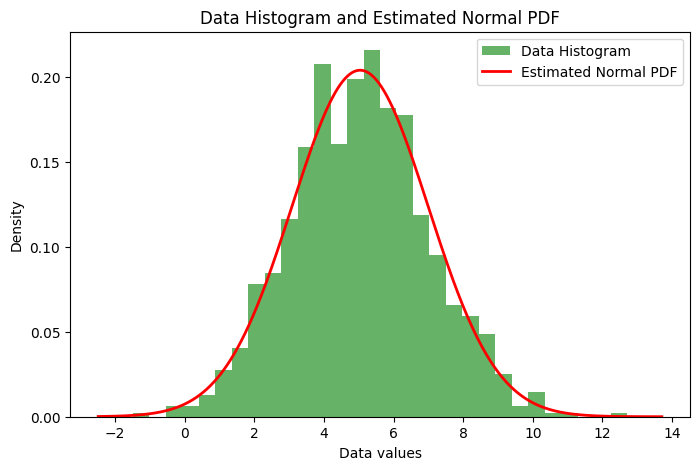

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
plt.plot(x_values, pdf_values, 'r', linewidth=2, label='Estimated Normal PDF')
plt.title("Data Histogram and Estimated Normal PDF")
plt.xlabel("Data values")
plt.ylabel("Density")
plt.legend()
plt.show()